# Introduction
## Our data
Here is a summary of our columns: 
age : 20 ~64
gender : F,M
height_cm,
weight_kg
body fat_%
diastolic : diastolic blood pressure (min)
systolic : systolic blood pressure (min)
gripForce
sit and bend forward_cm
sit-ups counts
broad jump_cm
class : A,B,C,D ( A: best) / stratified

We will train a model which will predict that will guess the gender.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('bodyPerformance.csv')
data.info

<bound method DataFrame.info of         age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  

In [44]:
data.size

160716

We will map class and gender to numbers, to make it easier work with our data. 

In [45]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
one_hot_encoder = OneHotEncoder()
encoded = one_hot_encoder.fit_transform(data[['gender']])
data_encoded = pd.DataFrame(encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['gender']))
data = pd.concat([data.drop(columns=['gender']), data_encoded], axis=1)
data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,0.0,1.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0.0,1.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,0.0,1.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,0.0,1.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,0.0,1.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
 10  class                    13393 non-null  int64  
 11  gender_F                 13393 non-null  float64
 12  gender_M                 13393 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [47]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,1.500187,0.367804,0.632196
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,1.118109,0.482226,0.482226
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,1.000000,0.000000,0.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,2.000000,0.000000,1.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,3.000000,1.000000,1.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000,3.000000,1.000000,1.000000


We see that the mean of gender strives more to 1, which means there are more data about males.  The minimum age is 21 and maximum is 64.

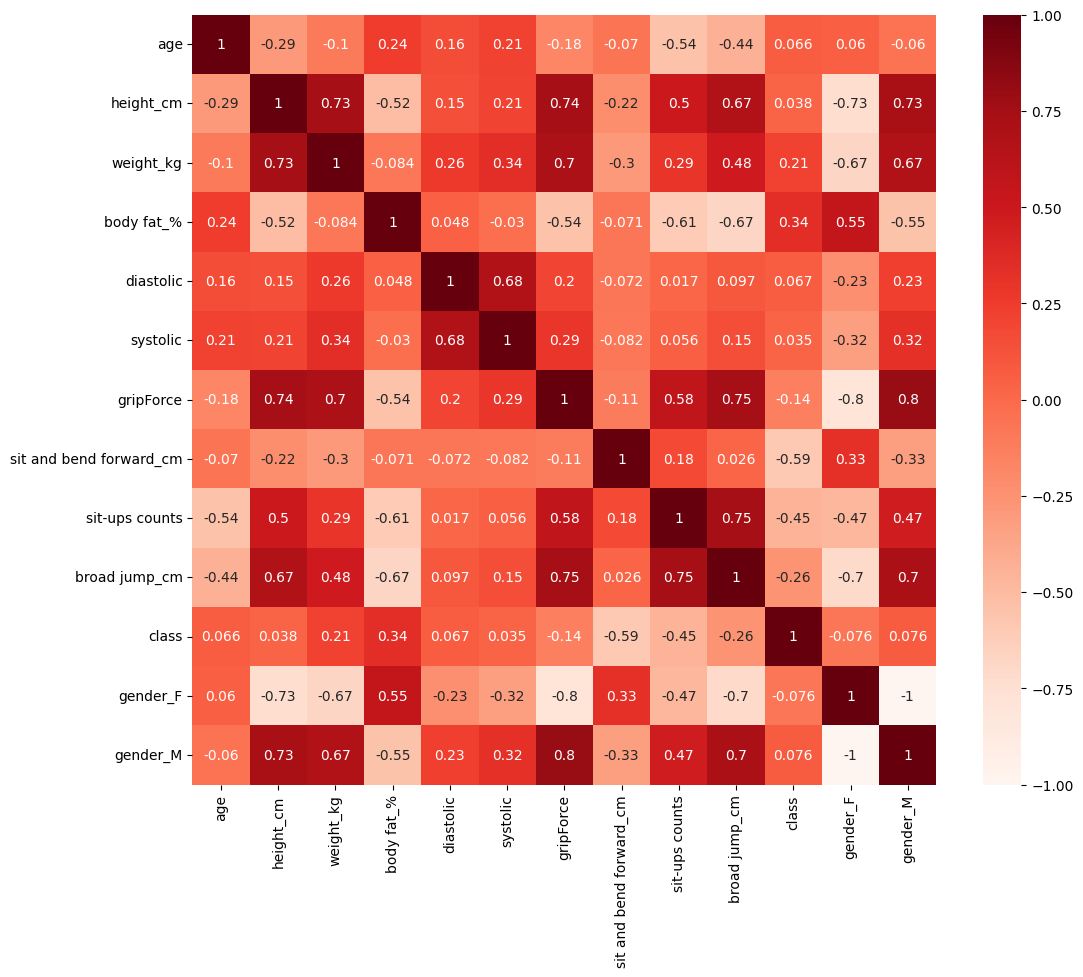

In [48]:
plt.figure(figsize=(12,10))
cor = data.corr(numeric_only=False)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

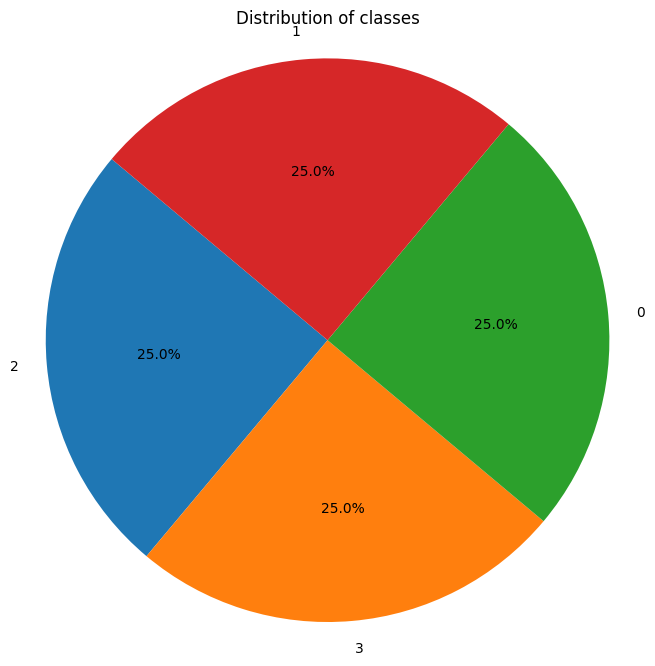

In [49]:
class_counts = data['class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


We have equal amount of records for each class

In [50]:
cor_target = abs(cor["class"])
cor_target.sort_values(ascending=False)

class                      1.000000
sit and bend forward_cm    0.588123
sit-ups counts             0.452832
body fat_%                 0.341956
broad jump_cm              0.262154
weight_kg                  0.214129
gripForce                  0.136088
gender_M                   0.075605
gender_F                   0.075605
diastolic                  0.066761
age                        0.065612
height_cm                  0.037753
systolic                   0.035484
Name: class, dtype: float64

As we see, the most impactful fields are sit and gripForce, height_cm and broad jump_cm % while the least impactful are diastolic, class, age.

# Training our model
## Using sklearn LogisticRegression

In [51]:
model = LogisticRegression()

# split our data
X_train, X_test, y_train, y_test = train_test_split(data[['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'body fat_%', 'broad jump_cm' ]],
                                                         data['class'], 
                                                    test_size=0.4, 
                                                    random_state=42)
# training our model
model.fit(X_train, y_train)

# predicting values
predicted_class = model.predict(X_test)
predicted_class

/home/ocirnat/Projects/sigmoid-tasks/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 1, 0, ..., 2, 3, 0])

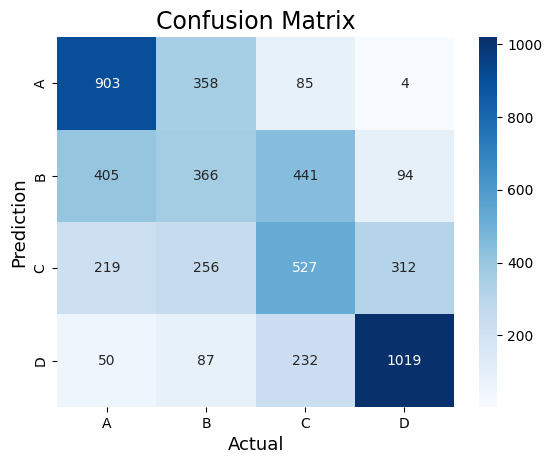

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,predicted_class)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['A','B', 'C', 'D'],
            yticklabels=['A','B', 'C', 'D'],
            cmap='Blues')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [53]:
report = classification_report(y_test, predicted_class)
print(report)   

              precision    recall  f1-score   support

           0       0.57      0.67      0.62      1350
           1       0.34      0.28      0.31      1306
           2       0.41      0.40      0.41      1314
           3       0.71      0.73      0.72      1388

    accuracy                           0.53      5358
   macro avg       0.51      0.52      0.51      5358
weighted avg       0.51      0.53      0.52      5358



As we see, the has different performance dependent on the class. If we would make a rank we would have D, A, C, B. The model does a great job with predicting class A and D, but a bad one with B and C. 